In [ ]:
# import numpy and pandas
import numpy as np
import pandas as pd


In [ ]:
# Importing Housing.csv
housing=pd.read_csv('/content/Housing.csv')


In [ ]:
# Looking at the first five rows
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# What type of values are stored in the columns?
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# Converting Yes to 1 and No to 0 using map function

housing['mainroad'] = housing['mainroad'].map({'yes':1 ,'no':0})
housing['guestroom'] = housing['guestroom'].map({'yes':1 ,'no':0})
housing['basement'] = housing['basement'].map({'yes':1 ,'no':0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes':1 ,'no':0})
housing['airconditioning'] = housing['airconditioning'].map({'yes':1 ,'no':0})
housing['prefarea'] = housing['prefarea'].map({'yes':1 ,'no':0})

In [ ]:
# Now let's see the head
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
# Creating a dummy variable for 'furnishingstatus' or you can say we want to do one-hot encoding on it.
status=pd.get_dummies(housing['furnishingstatus'])


In [ ]:
# The result has created three variables that are not needed.
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [ ]:
# we don't need 3 columns.
# we can use drop_first = True to drop the first column from status dataframe.
status = status.drop(['furnished'],axis=1)


In [ ]:
#print status
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [ ]:
#Adding the results to the master dataframe i.e housing
frames=[housing,status]
housing=pd.concat(frames,axis=1)

In [ ]:
# Dropping furnishingstatus from housing data as we have created the dummies for it
housing=housing.drop(['furnishingstatus'],axis=1)

In [ ]:
# Now let's see the head of our dataframe.
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#### Creating a new variable

In [ ]:
# Let us create the new metric and assign it to "areaperbedroom". As name suggested you need to calculate area per bedroom
housing['areaperbedroom'] =housing['area']/housing['bedrooms']

In [ ]:
# Create another new Metric:bathrooms per bedroom
housing['bbratio'] = housing['bathrooms']/housing['bedrooms']

In [ ]:
# print housing head
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


In [ ]:
#defining a normalisation function 
#hint use formula=(x-min(x))/(max(x) - min(x))
def normalize (x):
  y= (x-min(x))/(max(x) - min(x))
  return y

    
                                            
                                              
# applying normalize ( ) to all columns using apply function 
housing = housing.apply(normalize)

## Splitting Data into Training and Testing Sets

<p style='text-align: right;'> 5 points</p>


In [ ]:
# print all housing columns available to decide which all variables will be our feature and target variable
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [ ]:
# Putting feature variable to X
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]

# Putting response variable to y ie. price
y = housing['price']

In [ ]:
# import test_train_split module
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

# test and train split with train_size as 30% and random state as 100


The splitting of test and train procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.








## Building a linear model






In [ ]:
# Importing statsmodels module as sm
import statsmodels.api as sm

# Adding a constant column to our X_train dataframe
X_train = sm.add_constant(x_train)

# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Let's see the summary of our first linear model
summary_model=lm_1.summary()
summary_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           4.56e-82
Time:                        03:07:53   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0603      0.059      1.029      0.304      -0.055       0.176
area                0.5745      0.134      4.285      0.000       0.311       0.838
bedrooms           -0.0587      0.093     -0.632      0.528      -0.241       0.124
bathrooms           0.2336      0.126      1.849      0.065      -0.015       0.482
stories             0.1018      0.019      5.265      0.000       0.064       0.140
mainroad            0.0511      0.014      3.580      0.000       0.023       0.079
guestroom           0.0260      0.014      1.887      0.060      -0.001       0.053
basement            0.0208      0.011      1.877      0.061      -0.001       0.043
hotwaterheating     0.0875      0.022      4.048      0.000       0.045       0.130
airconditioning     0.0663      0.011      5.868      0.000       0.044       0.088
parking             0.0562      0.018      3.104      0.002       0.021       0.092
prefarea            0.0566      0.012      4.772      0.000       0.033       0.080
semi-furnished     -0.0008      0.012     -0.068      0.946      -0.024       0.022
unfurnished        -0.0323      0.013     -2.550      0.011      -0.057      -0.007
areaperbedroom     -0.3135      0.147     -2.139      0.033      -0.602      -0.025
bbratio             0.0439      0.104      0.421      0.674      -0.161       0.249
==============================================================================
Omnibus:                       87.283   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.328
Skew:                           1.023   Prob(JB):                     9.91e-61
Kurtosis:                       6.636   Cond. No.                         82.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Importing matplotlib and seaborn 
import matplotlib.pyplot as plt
import seaborn as sns

# write magic function matplotlib inline
%matplotlib inline 

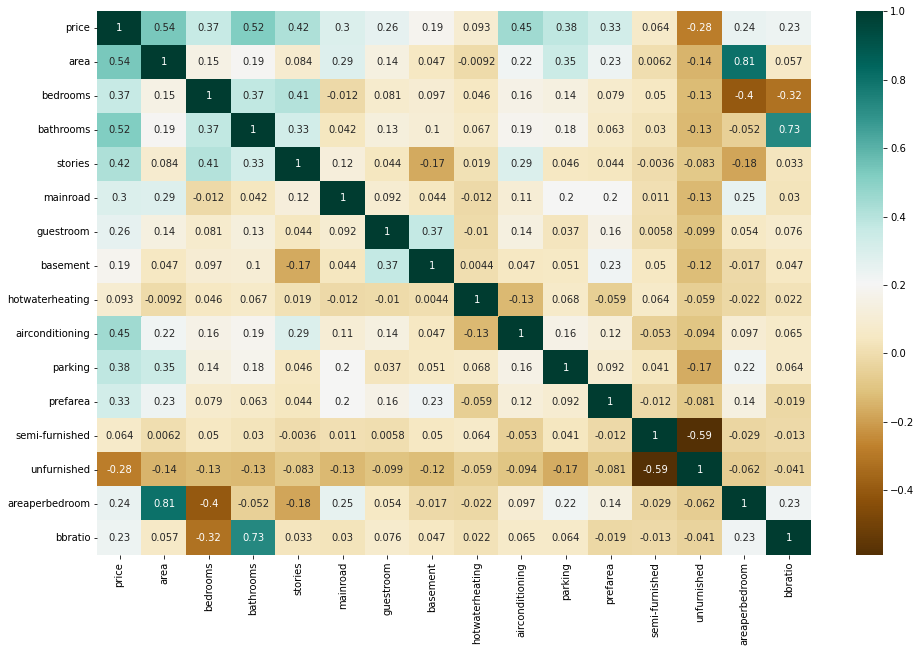

In [ ]:
# Let's see the correlation matrix on hoousing data
# Size of the figure=(16,10)
plt.figure(figsize=(16,10))
sns.heatmap(housing.corr(),annot=True,cmap = 'BrBG')



### Checking VIF

Multicollinearity can be detected via various methods. In this assignemnt, we will focus on the most common one – VIF (Variable Inflation Factors).<br>





In [ ]:
# import variance_inflation_factor module

# Define vif_scores function as stated above
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif_data=pd.DataFrame()
  vif_data["feature"] = X.columns
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  return vif_data                        









# print vif scores for all current input features
calc_vif(X)

,feature,VIF
0,area,57.516048
1,bedrooms,10.683404
2,bathrooms,11.106354
3,stories,2.805901
4,mainroad,7.910522
5,guestroom,1.492428
6,basement,2.045854
7,hotwaterheating,1.097694
8,airconditioning,1.768615
9,parking,2.007955


### Dropping the Variable and Updating the Model

Dropping highly correlated variables and insignificant variables through both correlation matrix and vif scores.

As you can see there are two groups of multicollinear variables. 
1. areaperbedroom and area
2. bbratio and bathrooms

the first group is neccesary for us to keep as it gives us relevant impact on traget, but from second set as we know that bbratio is not as significant as bathrooms, so we will drop it off.


In [ ]:
# Lets check vif scores again after removing bbratio from features.

calc_vif(X.drop('bbratio',1))

,feature,VIF
0,area,20.716025
1,bedrooms,10.026456
2,bathrooms,1.712298
3,stories,2.783201
4,mainroad,7.459237
5,guestroom,1.478756
6,basement,2.027730
7,hotwaterheating,1.093564
8,airconditioning,1.768236
9,parking,2.004052


As you can see the vif scores are still high. Lets drop bedroom also as input feature and again check vif scores.


In [ ]:
# Lets check vif scores after removing bedrooms from left features.

calc_vif(X.drop(['bbratio','bedrooms'],1))

,feature,VIF
0,area,14.978857
1,bathrooms,1.692180
2,stories,2.559555
3,mainroad,6.099134
4,guestroom,1.475441
5,basement,1.901473
6,hotwaterheating,1.087115
7,airconditioning,1.762488
8,parking,1.999982
9,prefarea,1.504964


As you can see the vif scores are still high. Lets drop areaperbedroom which we calculated as input feature and again check vif scores.

Its very natural that both area, bedroom and areaperbedroom will be highly correlated with each other as areaperbedroom is calculated out of area and bedroom.



In [ ]:
# Lets check vif scores after removing areaperbedroom from features which are left.

calc_vif(X.drop(['bbratio','bedrooms','areaperbedroom'],1))

,feature,VIF
0,area,4.427217
1,bathrooms,1.619363
2,stories,2.323144
3,mainroad,5.513523
4,guestroom,1.474326
5,basement,1.896942
6,hotwaterheating,1.086273
7,airconditioning,1.760737
8,parking,1.987943
9,prefarea,1.497335


Now as you can still se vif scores are again more than 5. But if you see only 'mainroad' feature which having high vif score does'nt mean that you will remove it.
You need to see the importance of that particular feature also in price prediction. Since mainoad, area and stories are really important to us. So you can go with removing semi-furnished feature next.

In [ ]:
# Lets check vif scores after removing semi-furnished from features which are left.

calc_vif(X.drop(['bbratio','bedrooms','areaperbedroom','semi-furnished'],1))

,feature,VIF
0,area,4.362200
1,bathrooms,1.619286
2,stories,2.301304
3,mainroad,4.845386
4,guestroom,1.470984
5,basement,1.860222
6,hotwaterheating,1.081743
7,airconditioning,1.753933
8,parking,1.987700
9,prefarea,1.490106


In [ ]:
# Lets check vif scores after removing basement from features which are left.

calc_vif(X.drop(['bbratio','bedrooms','areaperbedroom','semi-furnished','basement'],1))

,feature,VIF
0,area,4.362124
1,bathrooms,1.589915
2,stories,2.206626
3,mainroad,4.583261
4,guestroom,1.291867
5,hotwaterheating,1.079947
6,airconditioning,1.749777
7,parking,1.986493
8,prefarea,1.442071
9,unfurnished,1.340895




So in total  we have removed 5 features namely "bedrooms","bbratio","areaperbedroom","semi-furnished" and "basement".

we have our final list of input features. Lets drop these 5 features from X_train as well and rebuild ypur model.

## Making Predictions by rebuilding Model

<p style='text-align: right;'> 5 points</p>


Lets do another test train split after dropping highly correlated variables and insignificant variables from X.


In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.237016,0.4
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.298923,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.472584,0.6
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.240232,0.4
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.237016,0.1


In [ ]:
# Putting feature variable to X
X =housing[['area','bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'unfurnished']]

# Putting response variable to y ie. price
y = housing['price']

In [ ]:
# test train split again on X and y
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

Building our linear model again

In [ ]:
# Adding a constant column to our dataframe
 

X_train = sm.add_constant(x_train)
# Adding  constant variable to test dataframe
X_test = sm.add_constant(x_test)

# create a second fitted model
lm_2 = sm.OLS(y_train,X_train).fit()

In [ ]:
X_test.shape

(164, 12)

In [ ]:
X_train.shape

(381, 12)

In [ ]:
x_test.shape

(164, 11)

In [ ]:
x_train.shape

(381, 11)

In [ ]:
#print model 2 summary
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           2.73e-84
Time:                        03:07:55   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0319      0.015     

In [ ]:
# Making predictions
y_pred = lm_2.predict(X_test)

## Model Evaluation


 


The skill or performance of a regression model must be reported as an error in those predictions.





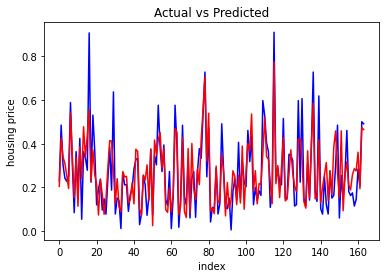

In [ ]:
# Actual vs Predicted graph as below
c = [i for i in range(1,165,1)]
fig = plt.figure()
plt.plot(range(len(y_test)), y_test, color='blue')
plt.plot(range(len(y_pred)), y_pred, color='red')
plt.title('Actual vs Predicted')
plt.xlabel('index')
plt.ylabel('housing price')
plt.show()

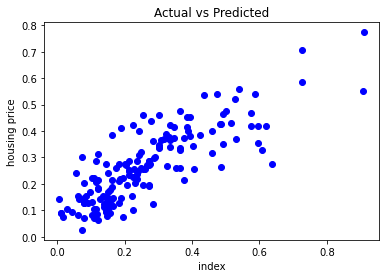

In [ ]:
# Plotting y_test and y_pred scatter plot to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred, color='blue')

plt.title('Actual vs Predicted')
plt.xlabel('index')
plt.ylabel('housing price')
plt.show()

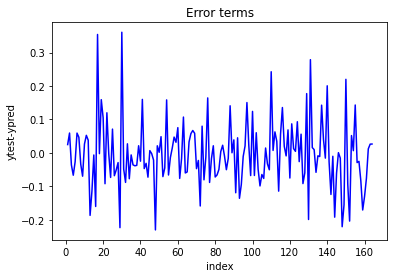

In [ ]:
# Plotting line chart of Error terms
fig = plt.figure()
c = [i for i in range(1,165,1)]
plt.plot(c,y_test-y_pred, color='blue')

plt.title('Error terms')
plt.xlabel('index')
plt.ylabel('ytest-ypred')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


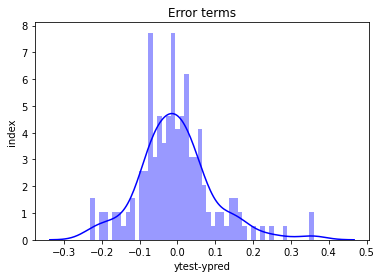

In [ ]:
# Plotting the error terms as dist plot to understand the distribution.
fig = plt.figure()
sns.distplot(y_test-y_pred, bins=50, color='blue')

plt.title('Error terms')
plt.xlabel('ytest-ypred')
plt.ylabel('index')
plt.show()

**Regression Metrics**



There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

1. Mean Squared Error (MSE).
2. Root Mean Squared Error (RMSE).
3. Mean Absolute Error (MAE)



In [ ]:
#import metrics module
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
rmse

#calculate and print RMSE


0.09834680988986308

In [ ]:
#calculate and print MSE
mse=mean_squared_error(y_test,y_pred)
mse

0.009672095015512869

In [ ]:
#calculate and print MAE
from sklearn.metrics import mean_absolute_error as mae
MAE=mae(y_test,y_pred)
MAE

0.07207530515287305

## Feature Selection




Once you have obtained your initial error metric/s, take note of which X’s have minimal impacts on y. Removing some of these features may result in an increased accuracy of your model.

So, We begin a process of trial and error, where the process is started over again, until a satisfactory model is produced.

To do this we already have a ready made library called RFE. 
So lets do feature selection using RFE using LinearRegression module.






In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
 lm = LinearRegression()
rfe =     RFE(lm)   
rfe= rfe.fit(X_train,y_train) 
print(rfe.support_)
print(rfe.ranking_)


 

[False  True  True  True False False False  True  True False  True False]
[7 1 1 1 3 4 6 1 1 2 1 5]


In [ ]:
#Print the total no. of features in X
print(len(X.columns))
#Get columns which are supported by RFE
col=X_train.columns[rfe.support_]
print(col)




11
Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')


As you can see that 6 features got selected out of initial 11 features.

## Visualising Data



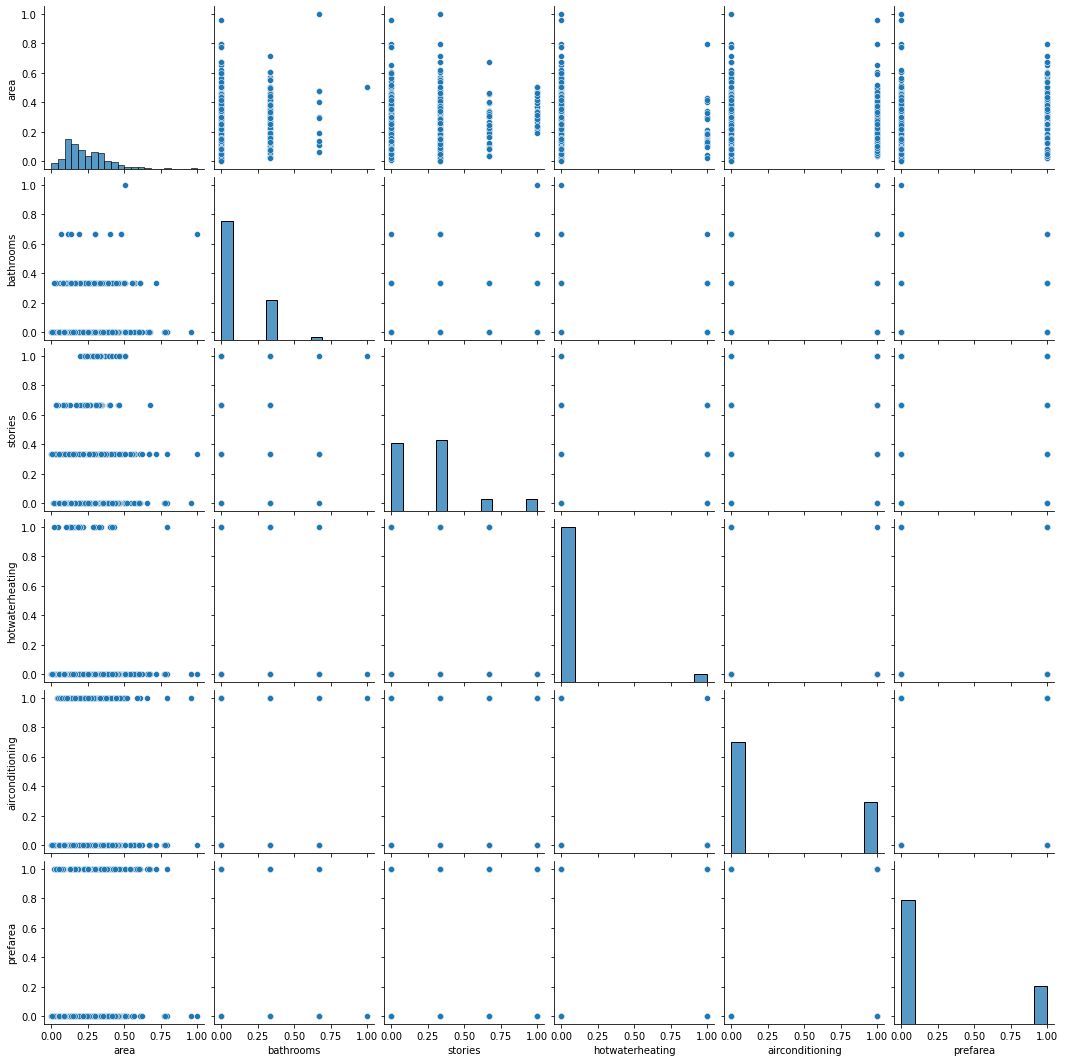

In [ ]:
# Let's plot a pair plot of all RFE selected variables in housing dataframe
sns.pairplot(housing[col])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


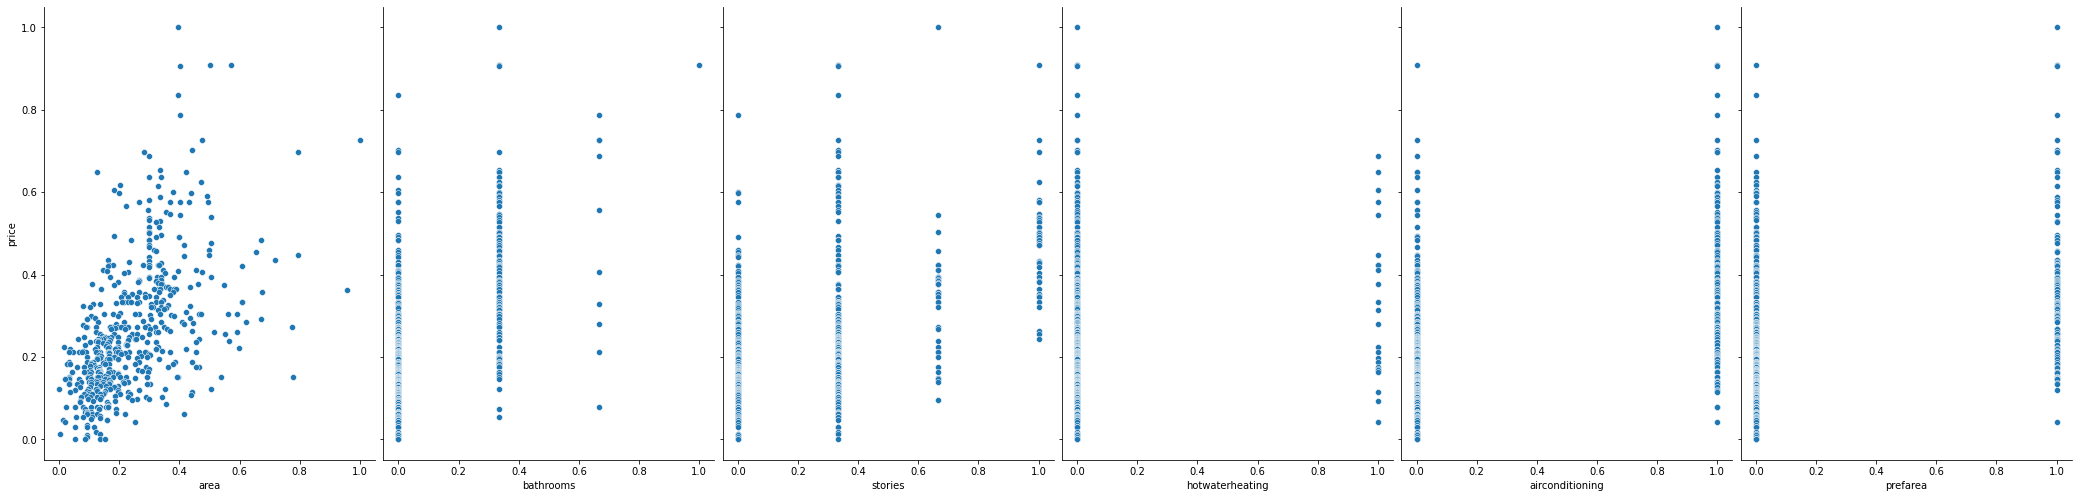

In [ ]:
# # Visualise the relationship between the features and the response using scatterplots (use size=7 and aspect=0.7 )
p=sns.pairplot(housing,x_vars=col,y_vars= 'price', size=7, aspect=0.7)


So above you can see that the relationship between target and features shows some constant relation.
Lets try our luck if this model performs better that you last model.


## Building model again with above selected features.



So this would be your third model

In [ ]:
# Creating X_train dataframe with RFE selected variables
X_train_fre =X_train[col]


In [ ]:
# Adding a constant variable in X_train_rfe
X_train_rfe = sm.add_constant(X_train_fre)

In [ ]:
# fitting your third linear model with y_train and X_train_rfe
lm_3 = sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
#print model 3 summary
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     106.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           6.98e-78
Time:                        03:08:12   Log-Likelihood:                 353.86
No. Observations:                 381   AIC:                            -693.7
Df Residuals:                     374   BIC:                            -666.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0609      0.011     

In [ ]:
# Calculating Vif scores on housing data with selected columns by RFE
calc_vif(housing[col])

,feature,VIF
0,area,2.245213
1,bathrooms,1.546979
2,stories,1.983682
3,hotwaterheating,1.064857
4,airconditioning,1.714386
5,prefarea,1.384793


Wohoo! all these features looks good .

Now let's use our model to make predictions.


In [ ]:
# Creating X_test dataframe with RFE selected variables
X_test_rfe = X_test[col]

# Adding a constant variable to X_test_rfe
X_test_rfe = sm.add_constant(X_test_rfe)

# Making predictions
y_pred = lm_3.predict(X_test_rfe)

Now again lets evaluate oour third model.



Text(0, 0.5, 'y_pred')

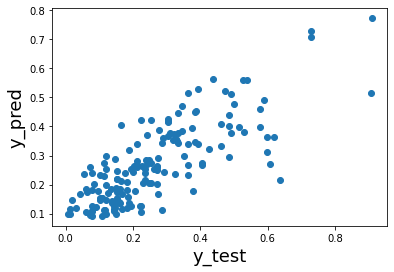

In [ ]:
# Plotting y_test and y_pred to understand the spread.
plt.scatter(y_test,y_pred)
fig.suptitle('y_test v y_pred',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=18)

In [ ]:
# Print RMSE, MSE and MAE scores for your third model
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mae(y_test,y_pred))

RMSE: 0.10615015826267064
MSE: 0.011267856099190026
MAE: 0.07902347035966725


## Model Selection




Seeing the results we can see that there is not much change in  model performance compared to your second model.
Infact rmse score got increased. The reason could be that we might have removed a/some features which were of importance.

May be your linear model wants some other features also to explain your target variable. 

We want you to underatand summary of all three models together

In [ ]:
print(lm_1.summary())
print(lm_2.summary())
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           4.56e-82
Time:                        03:08:12   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0603      0.059     

In [ ]:
import pickle

pickle.dump(lm_3,open('modelmultiple.pkl','wb'))

We gave you three metric explaination. Now just try to compare these things in all three models.
You will see that first model is perfoming better in terms of coefficient, R2 and adjusted r2. Also if you see metrics you calculated for model 1 and model 3, the first model is better there also.


So we can finalise that our second model is the best model to solve our problem statement ie.to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.
